# Demo: Analysis

This example is the continuation of the previous example: [filling gaps](https://metobs-toolkit.readthedocs.io/en/latest/examples/filling_example.html). This example serves as an introduction to the Analysis module.

In [1]:
import metobs_toolkit

your_dataset = metobs_toolkit.Dataset()
your_dataset.update_file_paths(
    input_data_file=metobs_toolkit.demo_datafile, # path to the data file
    input_metadata_file=metobs_toolkit.demo_metadatafile,
    template_file=metobs_toolkit.demo_template,
)
#Import the data
your_dataset.import_data_from_file()

#Get LCZ, and landcover fractions will be used later on
your_dataset.get_lcz()
your_dataset.get_landcover()

#Coarsen to 15-minutes frequencies
your_dataset.coarsen_time_resolution(freq='15T')

#Apply default quality control
your_dataset.apply_quality_control(obstype='temp') #we use the default settings in this example

#Interpret the outliers gaps.
your_dataset.convert_outliers_to_gaps()

#Fill gaps 
your_dataset.interpolate_gaps(obstype='temp')



The following data columns are renamed because of special meaning by the toolkit: {}


Luchtdruk is present in the datafile, but not found in the template! This column will be ignored.


Neerslagintensiteit is present in the datafile, but not found in the template! This column will be ignored.


Neerslagsom is present in the datafile, but not found in the template! This column will be ignored.


Rukwind is present in the datafile, but not found in the template! This column will be ignored.


Luchtdruk_Zeeniveau is present in the datafile, but not found in the template! This column will be ignored.


Globe Temperatuur is present in the datafile, but not found in the template! This column will be ignored.


The following metadata columns are renamed because of special meaning by the toolkit: {}


These stations will be removed because of only having one record: []


A 0 days 00:00:00 is given as an argument for a timedelta.


/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/datasetbase.py:137: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  dt = pd.Timedelta(timedeltaarg)


The windows are too small for stations  ['vlinder01', 'vlinder02', 'vlinder03', 'vlinder04', 'vlinder05', 'vlinder06', 'vlinder07', 'vlinder08', 'vlinder09', 'vlinder10', 'vlinder11', 'vlinder12', 'vlinder13', 'vlinder14', 'vlinder15', 'vlinder16', 'vlinder17', 'vlinder18', 'vlinder19', 'vlinder20', 'vlinder21', 'vlinder22', 'vlinder23', 'vlinder24', 'vlinder25', 'vlinder26', 'vlinder27', 'vlinder28'] to perform persistence check


The current gaps will be removed and new gaps are formed!


Cannot fill temp-gap of vlinder05 for 2022-09-01 00:00:00+00:00 --> 2022-09-01 05:45:00+00:00, duration: 0 days 05:45:00 or 24 records., because leading record is not valid.


Cannot fill temp-gap of vlinder05 for 2022-09-13 20:00:00+00:00 --> 2022-09-15 23:45:00+00:00, duration: 2 days 03:45:00 or 208 records., because trailing record is not valid.


## Creating an Analysis

The built-in analysis functionality is centered around the [*Analysis*](https://metobs-toolkit.readthedocs.io/en/latest/reference/analysis.html) class. First, create an *Analysis* object using the ``get_analysis()`` method.

In [2]:
analysis = metobs_toolkit.Analysis(orig_dataset=your_dataset, 
                                   use_gapfilled_values=True)
analysis

Instance of Analysis at 0x7fa14147f7c0

## Analysis methods

An overview of the available analysis methods can be seen in the documentation of the ``Analysis`` class. The relevant methods depend on your data and your interests. As an example, a demonstration of the filter and diurnal cycle of the demo data.

### Filtering data

It is common to filter your data according to specific meteorological phenomena or periods in time. To do this you can use the ``apply_filter()`` method.

/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/dataset_core.py:504: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combdf = pd.concat([df, outliersdf])  # combine the two


/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/dataset_core.py:504: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combdf = pd.concat([df, outliersdf])  # combine the two


colormap: tab20, is not well suited to color 28 categories.


<Axes: ylabel='temp (Celsius)'>

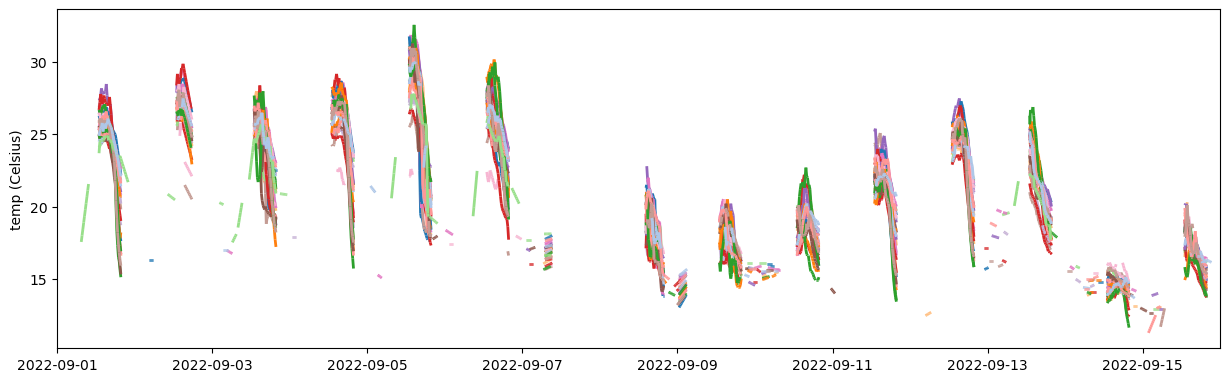

In [3]:
#filter to non-windy afternoons in the Autumn.
subset = analysis.apply_filter('wind_speed <= 2.5 & season=="autumn" & hour > 12 & hour < 20')

subset.make_plot()


## Diurnal cycle 

To make a diurnal cycle plot of your Analysis use the ``get_diurnal_statistics()`` method:

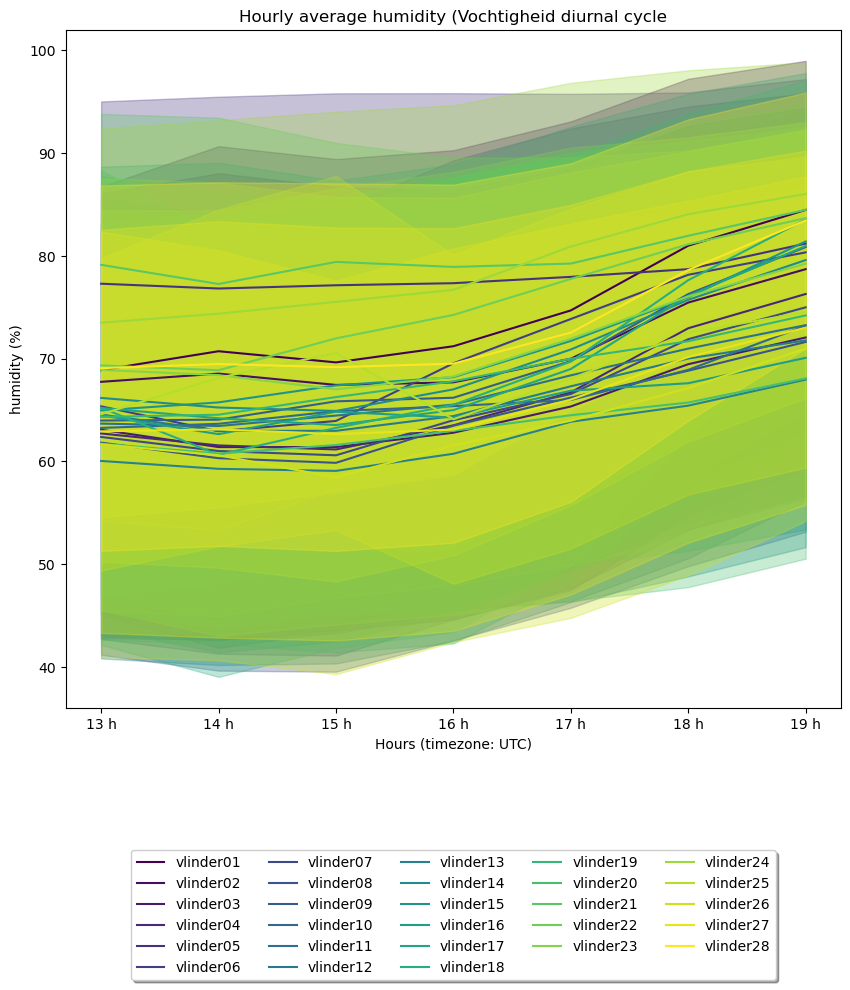

In [4]:
dirunal_statistics = subset.get_diurnal_statistics(colorby='name',
                                                   obstype='humidity', 
                                                   plot=True,
                                                   errorbands=True,
                                                  )
#Note that in this example statistics are computed for a short period and only for the non-windy autumn afternoons.

## Landcover correlation heatmap

If you are interested in the correlation matrices for landcoverfractions and an observationtype, you can use the ``Aanalysis.get_lc_correlation_matrices()`` method to do so. You can specify aggregation groups to compute correlations more specifically. The ``Analysis.plot_correlation_heatmap()`` method can be used to plot a landcover correlation matrix as a heatmap.

**Note**: The ``Aanalysis.get_lc_correlation_matrices()`` method is a complex method, and it is advised to read the documentation carefully before using it.

/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/dataset_core.py:504: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combdf = pd.concat([df, outliersdf])  # combine the two


/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/analysis.py:1718: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(groupby_labels)


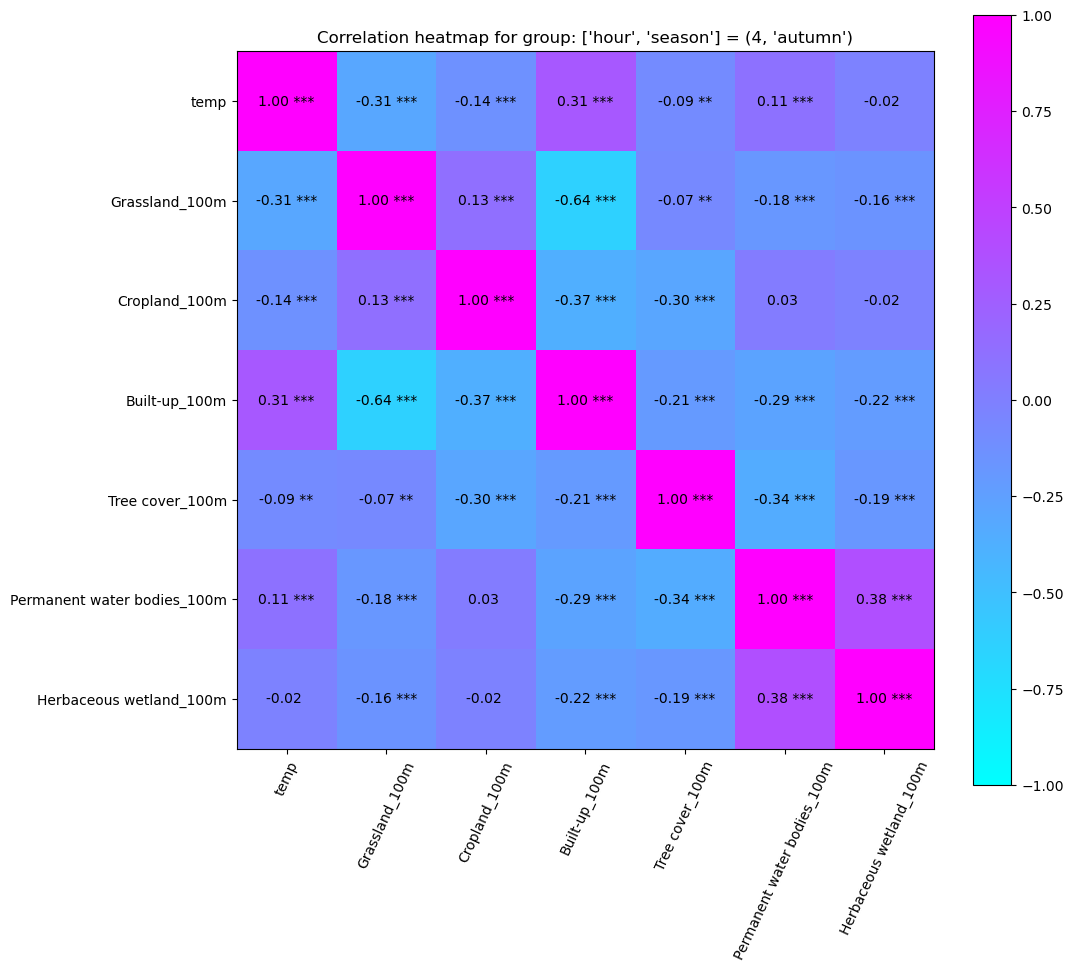

In [5]:
dict_of_cor_matrices = analysis.get_lc_correlation_matrices(
                            obstype=["temp"],
                            groupby_labels=['hour', 'season']
                                )

# plot heatmap
analysis.plot_correlation_heatmap(
                            groupby_value=(4, 'autumn')) #plot LC correlation matrix for autumn temp records at 4h00.
